In [2]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements(is_chapter2=True)

Cloning into 'notebooks'...
remote: Enumerating objects: 515, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 515 (delta 139), reused 126 (delta 122), pack-reused 354
Receiving objects: 100% (515/515), 28.61 MiB | 24.56 MiB/s, done.
Resolving deltas: 100% (246/246), done.
/content/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


In [3]:

# hide
from utils import *
setup_chapter()

Using transformers v4.13.0
Using datasets v2.8.0


# Text Classification

#### Dataset

In [4]:
from datasets import list_datasets

In [5]:
all_datasets = list_datasets()

In [6]:
len(all_datasets)

26051

In [7]:
all_datasets[:10]

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews']

In [8]:
## Loading dataset

from datasets import load_dataset

In [9]:
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [11]:
emotions["train"][0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [12]:
emotions["train"] # special dataset called Dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

# Dataset data structure is based on Apche Arrow which defines a typed columnar format that is more memory efficient than native Python. We can see what data types are being used under the hood by accessing the features attribute of a Dataset object:

In [13]:
train_ds = emotions["train"]

In [14]:
len(train_ds)

16000

In [15]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [16]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [17]:
train_ds[:5]["text"]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [18]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

# Loading datasets from local system

In [19]:
custom_data_path = "/content/Entity Recognition in Resumes.json"

In [21]:
custom_data = load_dataset("json", data_files = custom_data_path)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-da809d085d698213/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
custom_data

DatasetDict({
    train: Dataset({
        features: ['content', 'annotation', 'extras'],
        num_rows: 220
    })
})

In [23]:
custom_data["train"]["annotation"][1]

[{'label': ['Email Address'],
  'points': [{'start': 1155,
    'end': 1198,
    'text': 'indeed.com/r/Afreen-Jamadar/8baf379b705e37c6'}]},
 {'label': ['Skills'],
  'points': [{'start': 743,
    'end': 1140,
    'text': 'Database (Less than 1 year), HTML (Less than 1 year), Linux. (Less than 1 year), MICROSOFT\nACCESS (Less than 1 year), MICROSOFT WINDOWS (Less than 1 year)\n\nADDITIONAL INFORMATION\n\nTECHNICAL SKILLS:\n\n• Programming Languages: C, C++, Java, .net, php.\n• Web Designing: HTML, XML\n• Operating Systems: Windows […] Windows Server 2003, Linux.\n• Database: MS Access, MS SQL Server 2008, Oracle 10g, MySql.'}]},
 {'label': ['Graduation Year'],
  'points': [{'start': 729, 'end': 732, 'text': '2016'}]},
 {'label': ['College Name'],
  'points': [{'start': 675,
    'end': 702,
    'text': 'Shivaji University Kolhapur '}]},
 {'label': ['Degree'],
  'points': [{'start': 631,
    'end': 672,
    'text': 'Bachelor of Engg in Information Technology'}]},
 {'label': ['Graduation Yea

#### Loading data from url + giving custom column names

In [24]:
# The original URL used in the book is no longer available, so we use a different one
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}
     

--2023-03-26 17:17:29--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 23.20.207.15, 34.203.133.210, 54.82.45.103, ...
Connecting to huggingface.co (huggingface.co)|23.20.207.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  4.26MB/s    in 0.4s    

2023-03-26 17:17:30 (4.26 MB/s) - ‘train.txt’ saved [1658616/1658616]



In [25]:

!head -n 1 train.txt

i didnt feel humiliated;sadness


In [26]:
#hide_output
emotions_local = load_dataset("csv", data_files="train.txt", sep=";",   #### passing the column names
                              names=["text", "label"])
     

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-f7fed6ec688c79cf/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:

#hide_output
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";", 
                               names=["text", "label"])
     

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-77d91d09868a1841/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

# Datasets to DataFrames: Converting datasets to dataframes

In [28]:
import pandas as pd

In [29]:
emotions.set_format(type = "pandas")  ## only changes the output format. Underlying data structure remains same

In [30]:
emotions["train"][:].head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [31]:
df = emotions["train"][:]

In [32]:
### converting int to str

def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)


In [33]:
df["label_name"] = df["label"].apply(label_int2str)

In [34]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# EDA: Visualizing class distribution

In [35]:
import matplotlib.pyplot as plt


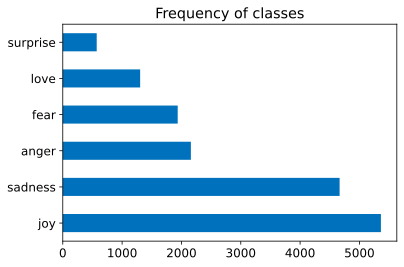

In [36]:
df["label_name"].value_counts().plot.barh()
plt.title("Frequency of classes")
plt.show()

## Dataset is heavily imbalanced

Measures to counter this:

1. Oversampling
2. Undersampling
3. SMOTE
4. Gather more labeled data from underrepresented classes

# Imabalanced-learn : https://imbalanced-learn.org/stable/

# How long are our tweets??

Transformer models have a maximum input sequence length that is referred to as the maximum context size. For applications using DistilBERT, the maximum context size is 512 tokens, which amounts to a few paragraphs of text. As we'll see in the next section, a token is an atomic piece of text; for now, we'll treat a token as a single word. We can get a rough estimate of tweet lengths per emotion by looking at the distribution of words per tweet:



In [37]:

df["Words Per Tweet"] = df["text"].str.split().apply(len)

In [38]:
df.head()

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


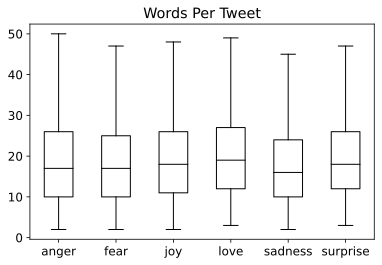

In [39]:
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()


# From the plot we see that for each emotion, most tweets are around 15 words long and the longest tweets are well below DistilBERT's maximum context size. Texts that are longer than a model's context size need to be truncated, which can lead to a loss in performance if the truncated text contains crucial information; in this case, it looks like that won't be an issue.

In [40]:
emotions.reset_format()

# Tokenization

### Character tokenization
simplest tokenization scheme is to feed each character individually to the model.

In [41]:
text = "Tokenization of text is an important step"

In [42]:
tokenized_text = list(text)

In [43]:
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', ' ', 'o', 'f', ' ',
't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', 'n', ' ', 'i', 'm', 'p', 'o', 'r',
't', 'a', 'n', 't', ' ', 's', 't', 'e', 'p']


In [44]:
# Need to convert each character to integer, process called as numericalization

In [45]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}

In [46]:
token2idx

{' ': 0,
 'T': 1,
 'a': 2,
 'e': 3,
 'f': 4,
 'i': 5,
 'k': 6,
 'm': 7,
 'n': 8,
 'o': 9,
 'p': 10,
 'r': 11,
 's': 12,
 't': 13,
 'x': 14,
 'z': 15}

In [47]:

input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[1, 9, 6, 3, 8, 5, 15, 2, 13, 5, 9, 8, 0, 9, 4, 0, 13, 3, 14, 13, 0, 5, 12, 0,
2, 8, 0, 5, 7, 10, 9, 11, 13, 2, 8, 13, 0, 12, 13, 3, 10]


In [48]:
# Converting input id to 2d tensors

In [49]:
## Label encoding -- for nominal attributes

In [50]:

categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


### The problem with this approach is that it creates a fictitious ordering between the names, and neural networks are really good at learning these kinds of relationships. So instead, we can create a new column for each category and assign a 1 where the category is true, and a 0 otherwise. In Pandas, this can be implemented with the get_dummies() function as follows:

In [51]:
## OHE encoding  ----- for ordinal attributes

In [52]:
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


## OHE in pytorch

In [53]:
import torch
import torch.nn.functional as F

In [54]:
input_ids = torch.tensor(input_ids)

In [55]:
input_ids

tensor([ 1,  9,  6,  3,  8,  5, 15,  2, 13,  5,  9,  8,  0,  9,  4,  0, 13,  3,
        14, 13,  0,  5, 12,  0,  2,  8,  0,  5,  7, 10,  9, 11, 13,  2,  8, 13,
         0, 12, 13,  3, 10])

In [56]:
one_hot_encodings  = F.one_hot(input_ids, num_classes = len(token2idx))

In [57]:
one_hot_encodings

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0,

In [58]:
## For each of the 38 input tokens we now have a one-hot vector with 20 dimensions, since our vocabulary consists of 20 unique characters.

In [59]:
## Warning: It's important to always set num_classes in the one_hot() function because otherwise the one-hot vectors may end up being shorter than the length of the vocabulary (and need to be padded with zeros manually). In TensorFlow, the equivalent function is tf.one_hot(), where the depth argument plays the role of num_classes.

### From our simple example we can see that character-level tokenization ignores any structure in the text and treats the whole string as a stream of characters. Although this helps deal with misspellings and rare words, the main drawback is that linguistic structures such as words need to be learned from the data. This requires significant compute, memory, and data. For this reason, character tokenization is rarely used in practice. Instead, some structure of the text is preserved during the tokenization step. Word tokenization is a straightforward approach to achieve this, so let's take a look at how it works.

# Word Tokenization

In [61]:
tokenized_text = text.split()

In [62]:
tokenized_text

['Tokenization', 'of', 'text', 'is', 'an', 'important', 'step']

#### Can lead to huge vocabulary sizes. Want to avoid such situation

# Subward tokenization:

Want to combine character and word tokenization. Want to split rarer tokens so that they can be handled easily, while we dont want to split common occuring words. 

Word Piece : Used by BERT and Distillbert
https://paperswithcode.com/method/wordpiece

In [63]:
from transformers import AutoTokenizer

In [64]:
model_ckpt = "distilbert-base-uncased"

In [65]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

### The AutoTokenizer class belongs to a larger set of "auto" classes whose job is to automatically retrieve the model's configuration, pretrained weights, or vocabulary from the name of the checkpoint. This allows you to quickly switch between models, but if you wish to load the specific class manually you can do so as well. For example, we could have loaded the DistilBERT tokenizer as follows:

from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [66]:
encoded_text = tokenizer(text)

In [67]:
encoded_text

{'input_ids': [101, 19204, 3989, 1997, 3793, 2003, 2019, 2590, 3357, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [68]:
text

'Tokenization of text is an important step'

In [69]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [70]:
tokens

['[CLS]',
 'token',
 '##ization',
 'of',
 'text',
 'is',
 'an',
 'important',
 'step',
 '[SEP]']

#### Steps performed:

1. Special tokens (CLS, SEP) added

2. tokens lowercased

3. Some tokens split.


In [71]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenization of text is an important step [SEP]'

In [72]:
tokenizer.vocab_size

30522

In [73]:
tokenizer.model_max_length

512

In [74]:

tokenizer.model_input_names

['input_ids', 'attention_mask']

# Tokenizing whole dataset

To tokenize the whole corpus, we'll use the map() method of our DatasetDict object. We'll encounter this method many times throughout this book, as it provides a convenient way to apply a processing function to each element in a dataset. As we'll soon see, the map() method can also be used to create new rows and columns.

In [75]:
def tokenize(batch):
  return tokenizer(batch["text"], padding = True, truncation = True)

### This function applies the tokenizer to a batch of examples; padding=True will pad the examples with zeros to the size of the longest one in a batch, and truncation=True will truncate the examples to the model's maximum context size. To see tokenize() in action, let's pass a batch of two examples from the training set:

In [78]:
tokenize(emotions["train"][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [79]:
#### tokenizing 1st 2 data points

In [80]:
tokenizer.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

Also note that in addition to returning the encoded tweets as input_ids, the tokenizer returns a list of attention_mask arrays. This is because we do not want the model to get confused by the additional padding tokens: the attention mask allows the model to ignore the padded parts of the input. <> provides a visual explanation of how the input IDs and attention masks are padded.



In [81]:
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

By default, the map() method operates individually on every example in the corpus, so setting batched=True will encode the tweets in batches. Because we've set batch_size=None, our tokenize() function will be applied on the full dataset as a single batch. This ensures that the input tensors and attention masks have the same shape globally, and we can see that this operation has added new input_ids and attention_mask columns to the dataset:

In [82]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# Training a text classifier

## First, the text is tokenized and represented as one-hot vectors called token encodings. The size of the tokenizer vocabulary determines the dimension of the token encodings, and it usually consists of 20k–200k unique tokens. Next, these token encodings are converted to token embeddings, which are vectors living in a lower-dimensional space. The token embeddings are then passed through the encoder block layers to yield a hidden state for each input token. For the pretraining objective of language modeling,⁠footnote:[In the case of DistilBERT, it's guessing the masked tokens.] each hidden state is fed to a layer that predicts the masked input tokens. For the classification task, we replace the language modeling layer with a classification layer. 

##In practice, PyTorch skips the step of creating one-hot vectors for token encodings because multiplying a matrix with a one-hot vector is the same as selecting a column from the matrix. This can be done directly by getting the column with the token ID from the matrix. We'll see this in <<chapter_anatomy>> when we use the nn.Embedding class.

We have two options to train such a model on our Twitter dataset:

1. Feature extraction:: We use the hidden states as features and just train a classifier on them, without modifying the pretrained model.


2. Fine-tuning:: We train the whole model end-to-end, which also updates the parameters of the pretrained model.

### 1. Transformers as Feature Extractors: 

We have two options to train such a model on our Twitter dataset:

Using a transformer as a feature extractor is fairly simple. We freeze the body's weights during training and use the hidden states as features for the classifier. The advantage of this approach is that we can quickly train a small or shallow model. Such a model could be a neural classification layer or a method that does not rely on gradients, such as a random forest. This method is especially convenient if GPUs are unavailable, since the hidden states only need to be precomputed once.

In [83]:
model_ckpt

'distilbert-base-uncased'

In [84]:
from transformers import AutoModel, AutoFeatureExtractor

In [88]:
import torch

In [90]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [91]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

# The AutoModel class converts the token encodings to embeddings, and then feeds them through the encoder stack to return the hidden states. Let's take a look at how we can extract these states from our corpus.

In [92]:
text = "This is a test text"

In [102]:
tokenized_text = tokenizer(text, return_tensors="pt")  ### returns the output as pytorch tensor

In [103]:
tokenized_text

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231, 3793,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [104]:

inputs = {k:v.to(device) for k,v in tokenized_text.items()}

In [105]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231, 3793,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [107]:
with torch.no_grad():
  outputs = model(**inputs)

In [108]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1676, -0.1817,  0.0275,  ..., -0.1321,  0.2312,  0.5087],
         [-0.5611, -0.4371, -0.0930,  ..., -0.3916,  0.5704,  0.4118],
         [-0.3804, -0.2959,  0.1690,  ..., -0.1369,  0.2177,  1.0352],
         ...,
         [ 0.3208, -0.3239,  0.0087,  ..., -0.5381,  0.2514, -0.2861],
         [ 0.0922, -0.2174, -0.1331,  ...,  0.1120,  0.1779,  0.2587],
         [ 0.9091,  0.1741, -0.5596,  ...,  0.1371, -0.6995, -0.1811]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [109]:
outputs.last_hidden_state.size()

torch.Size([1, 7, 768])